In [1]:
import nltk
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("punkt")
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = set(stopwords.words('english'))
from gensim.models.coherencemodel import CoherenceModel

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import pandas as pd
df = pd.read_csv("/content/yelp_20.csv")

In [ ]:
import csv
from csv import reader
tit = []
with open("/content/yelp_20.csv", 'r') as read_obj:
    # pass the file object to reader() to get the reader object
    csv_reader = reader(read_obj)
    # Iterate over each row in the csv using reader object
    for row in csv_reader:
        # row variable is a list that represents a row in csv
        tit.append(row)

In [ ]:
print(len(tit))

300099


In [ ]:
print(tit[:100])

[['this fave thai excellent flavors prepared perfectly nice staff dumplings thai crispy chicken yellow curry perfect looking forward going back soon they took great care thank'], ['allie great server service really contributed great atmosphere great food overall great experi'], ['waited awhile food wrong size drinks.. napkins..'], ['first time eating spot great customer service great food.. would definitely come back'], ['this place scam fall tricks they cheat bucks rental just read reviews dirty tactics keep business long'], ['from experience pizza great experience good pizza friendly staff around nice decor management area stop check definitely going back'], ['this great choice lunch clean inviting coworker enjoyed chicken tenders made fresh order selection beer cocktails nice misha bartender/server provided great conversation excellent service highly recommend bloody mari'], ['arrived late friend group waiter many came take order many know order right.. location right young simple h

In [ ]:
val = []
for i in tit:
  try:
    val.append(i[0])
  except:
    pass
    #val.append(i[1])

In [ ]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = set(stopwords.words('english'))
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim

tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = set(stopwords.words('english'))
# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()
    
doc_set = val
# list for tokenized documents in loop
texts = []

# loop through document list
for i in doc_set:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

# generate LDA model


In [ ]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=8, id2word = dictionary, passes=10)

In [ ]:
coh = []
for i in range(6, 12):
  lda = models.LdaMulticore(corpus, id2word=dictionary, num_topics=8, workers=20, chunksize=20, passes=2, batch=True, alpha='symmetric',
                  eta=1, decay=0.3, offset=1.0, eval_every=3, iterations=i,
                  gamma_threshold=0.1, random_state=120)
  top5 = lda.print_topics(num_topics=8, num_words=7)
  c = 0
  for i in top5:
    c += 1
    print("Topic "+str(c))
    print(i)

  coherence_model_lda = CoherenceModel(model=lda, texts=texts, dictionary=dictionary, coherence='c_v')
  coh.append(coherence_model_lda.get_coherence())
  print(coherence_model_lda.get_coherence())

In [10]:
coh = []
for i in range(6, 12):
  lda = models.LdaMulticore(corpus, id2word=dictionary, num_topics=i, workers=20, chunksize=20, passes=2, batch=True, alpha='symmetric',
                  eta=1, decay=0.8, offset=1.0, eval_every=1, iterations=4,
                  gamma_threshold=0.01, random_state=12)
  top5 = lda.print_topics(num_topics=5, num_words=7)
  c = 0
  for i in top5:
    c += 1
    print("Topic "+str(c))
    print(i)

  coherence_model_lda = CoherenceModel(model=lda, texts=texts, dictionary=dictionary, coherence='c_v')
  coh.append(coherence_model_lda.get_coherence())
  print(coherence_model_lda.get_coherence())
  

Topic 1
(2, '0.011*"place" + 0.010*"good" + 0.010*"like" + 0.008*"great" + 0.008*"food" + 0.008*"time" + 0.007*"servic"')
Topic 2
(1, '0.012*"time" + 0.009*"place" + 0.008*"would" + 0.008*"food" + 0.007*"good" + 0.007*"great" + 0.007*"like"')
Topic 3
(5, '0.011*"place" + 0.011*"great" + 0.011*"good" + 0.010*"food" + 0.009*"like" + 0.009*"order" + 0.008*"time"')
Topic 4
(4, '0.010*"would" + 0.009*"food" + 0.009*"place" + 0.009*"time" + 0.008*"servic" + 0.008*"order" + 0.008*"good"')
Topic 5
(0, '0.013*"food" + 0.009*"place" + 0.008*"good" + 0.008*"time" + 0.007*"servic" + 0.007*"order" + 0.007*"back"')
0.32088256180066477
Topic 1
(0, '0.014*"food" + 0.009*"place" + 0.008*"time" + 0.007*"good" + 0.007*"order" + 0.007*"servic" + 0.007*"back"')
Topic 2
(6, '0.011*"good" + 0.010*"place" + 0.008*"great" + 0.008*"servic" + 0.008*"food" + 0.008*"like" + 0.007*"time"')
Topic 3
(5, '0.010*"great" + 0.010*"place" + 0.010*"good" + 0.010*"food" + 0.009*"like" + 0.009*"order" + 0.008*"time"')
Topic 

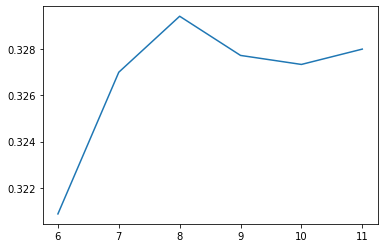

In [13]:
import matplotlib.pyplot as plt
x = [*(range(6, 12))]
y = coh
plt.plot(x, y)
plt.show()

In [ ]:
'''lda = models.LdaMulticore(corpus, id2word=dictionary, num_topics=8, workers=20, chunksize=20, passes=2, batch=True, alpha='symmetric',
                 eta=1, decay=0.8, offset=1.0, eval_every=1, iterations=4,
                 gamma_threshold=0.01, random_state=12)'''
top5 = lda.print_topics(num_topics=5, num_words=7)
c = 0
for i in top5:
  c += 1
  print("Topic "+str(c))
  print(i)

coherence_model_lda = CoherenceModel(model=lda, texts=texts, dictionary=dictionary, coherence='c_v')

print(coherence_model_lda.get_coherence())

Topic 1
(0, '0.013*"food" + 0.009*"place" + 0.008*"good" + 0.008*"order" + 0.007*"time" + 0.007*"servic" + 0.007*"great"')
Topic 2
(1, '0.012*"time" + 0.009*"place" + 0.008*"food" + 0.008*"would" + 0.008*"great" + 0.008*"good" + 0.007*"like"')
Topic 3
(2, '0.011*"place" + 0.011*"good" + 0.010*"like" + 0.009*"great" + 0.008*"food" + 0.008*"time" + 0.007*"servic"')
Topic 4
(3, '0.011*"good" + 0.010*"place" + 0.009*"great" + 0.009*"servic" + 0.009*"food" + 0.008*"like" + 0.007*"time"')
Topic 5
(4, '0.010*"would" + 0.009*"place" + 0.009*"food" + 0.009*"order" + 0.009*"time" + 0.008*"servic" + 0.008*"good"')
0.3245648314814551


In [ ]:
'''lda = models.LdaMulticore(corpus, id2word=dictionary, num_topics=8, workers=20, chunksize=20, passes=2, batch=True, alpha='symmetric',
                 eta=1, decay=0.8, offset=1.0, eval_every=1, iterations=4,
                 gamma_threshold=0.01, random_state=12)'''
top8 = lda.print_topics(num_topics=8, num_words=7)
c = 0
for i in top8:
  c += 1
  print("Topic "+str(c))
  print(i)

coherence_model_lda = CoherenceModel(model=lda, texts=texts, dictionary=dictionary, coherence='c_v')

print(coherence_model_lda.get_coherence())

Topic 1
(0, '0.014*"food" + 0.008*"place" + 0.008*"time" + 0.007*"good" + 0.007*"order" + 0.007*"servic" + 0.006*"back"')
Topic 2
(1, '0.012*"time" + 0.008*"place" + 0.008*"food" + 0.007*"would" + 0.007*"great" + 0.007*"like" + 0.007*"good"')
Topic 3
(2, '0.011*"place" + 0.010*"good" + 0.010*"like" + 0.008*"great" + 0.008*"food" + 0.008*"time" + 0.007*"servic"')
Topic 4
(3, '0.010*"good" + 0.010*"place" + 0.009*"servic" + 0.009*"food" + 0.009*"great" + 0.008*"time" + 0.007*"like"')
Topic 5
(4, '0.009*"would" + 0.009*"food" + 0.009*"time" + 0.009*"place" + 0.008*"order" + 0.008*"servic" + 0.007*"good"')
Topic 6
(5, '0.011*"great" + 0.010*"place" + 0.010*"good" + 0.010*"food" + 0.009*"like" + 0.009*"order" + 0.008*"time"')
Topic 7
(6, '0.011*"good" + 0.011*"place" + 0.009*"great" + 0.008*"servic" + 0.008*"food" + 0.008*"time" + 0.008*"like"')
Topic 8
(7, '0.009*"place" + 0.009*"would" + 0.008*"food" + 0.008*"good" + 0.008*"great" + 0.007*"servic" + 0.007*"time"')
0.3294071579508878


In [ ]:
#passes 10
top8 = ldamodel.print_topics(num_topics=8, num_words=7)
c = 0
for i in top8:
  c += 1
  print("Topic "+str(c))
  print(i)

coherence_model_lda = CoherenceModel(model=ldamodel, texts=texts, dictionary=dictionary, coherence='c_v')

print(coherence_model_lda.get_coherence())

Topic 1
(0, '0.026*"call" + 0.016*"would" + 0.012*"servic" + 0.011*"told" + 0.010*"said" + 0.009*"back" + 0.008*"time"')
Topic 2
(1, '0.013*"store" + 0.013*"like" + 0.009*"locat" + 0.009*"shop" + 0.009*"place" + 0.009*"find" + 0.008*"price"')
Topic 3
(2, '0.018*"time" + 0.018*"order" + 0.015*"wait" + 0.015*"food" + 0.011*"place" + 0.011*"servic" + 0.011*"would"')
Topic 4
(3, '0.020*"massag" + 0.011*"pour" + 0.009*"celebr" + 0.008*"http" + 0.007*"l" + 0.007*"www" + 0.007*"com"')
Topic 5
(4, '0.036*"great" + 0.031*"food" + 0.029*"place" + 0.022*"good" + 0.020*"servic" + 0.017*"love" + 0.012*"friendli"')
Topic 6
(5, '0.019*"good" + 0.014*"food" + 0.014*"order" + 0.011*"chicken" + 0.010*"like" + 0.009*"fri" + 0.009*"place"')
Topic 7
(6, '0.017*"great" + 0.015*"time" + 0.012*"work" + 0.012*"recommend" + 0.011*"help" + 0.010*"staff" + 0.010*"experi"')
Topic 8
(7, '0.026*"room" + 0.013*"stay" + 0.013*"hotel" + 0.010*"night" + 0.010*"vega" + 0.009*"nice" + 0.008*"show"')
0.43525166432094414


In [ ]:
#passes 40
top6 = ldamodel.print_topics(num_topics=6, num_words=7)
c = 0
for i in top6:
  c += 1
  print("Topic "+str(c))
  print(i)

Topic 1
(0, '0.014*"would" + 0.013*"time" + 0.012*"call" + 0.009*"back" + 0.009*"said" + 0.009*"servic" + 0.009*"told"')
Topic 2
(1, '0.032*"great" + 0.018*"place" + 0.017*"servic" + 0.017*"alway" + 0.016*"time" + 0.016*"love" + 0.016*"friendli"')
Topic 3
(2, '0.012*"room" + 0.011*"like" + 0.009*"place" + 0.007*"store" + 0.006*"park" + 0.006*"nice" + 0.006*"hotel"')
Topic 4
(3, '0.037*"food" + 0.020*"good" + 0.017*"place" + 0.017*"servic" + 0.017*"great" + 0.014*"order" + 0.012*"restaur"')
Topic 5
(4, '0.017*"good" + 0.013*"food" + 0.012*"chicken" + 0.012*"order" + 0.012*"place" + 0.012*"like" + 0.009*"fri"')
Topic 6
(5, '0.013*"class" + 0.011*"offic" + 0.010*"doctor" + 0.008*"care" + 0.007*"pain" + 0.006*"dog" + 0.005*"patient"')


In [ ]:
#passes 10
top8 = ldamodel.print_topics(num_topics=8, num_words=7)
c = 0
for i in top8:

  c += 1
  print("Topic "+str(c))
  print(i)

Topic 1
(0, '0.029*"call" + 0.016*"would" + 0.013*"servic" + 0.012*"told" + 0.011*"compani" + 0.009*"said" + 0.009*"phone"')
Topic 2
(1, '0.037*"food" + 0.034*"great" + 0.030*"place" + 0.025*"good" + 0.020*"servic" + 0.015*"love" + 0.011*"friendli"')
Topic 3
(2, '0.030*"room" + 0.015*"hotel" + 0.015*"stay" + 0.013*"park" + 0.012*"nice" + 0.010*"night" + 0.010*"area"')
Topic 4
(3, '0.015*"show" + 0.014*"hair" + 0.007*"dress" + 0.006*"wed" + 0.006*"beauti" + 0.005*"look" + 0.005*"dog"')
Topic 5
(4, '0.015*"store" + 0.013*"like" + 0.011*"price" + 0.010*"shop" + 0.008*"place" + 0.008*"find" + 0.008*"locat"')
Topic 6
(5, '0.017*"good" + 0.014*"order" + 0.013*"chicken" + 0.011*"like" + 0.011*"fri" + 0.009*"tast" + 0.009*"sauc"')
Topic 7
(6, '0.018*"time" + 0.018*"order" + 0.014*"wait" + 0.012*"food" + 0.012*"would" + 0.012*"back" + 0.011*"servic"')
Topic 8
(7, '0.020*"great" + 0.017*"time" + 0.014*"recommend" + 0.013*"work" + 0.011*"help" + 0.011*"staff" + 0.011*"servic"')


In [ ]:

#passes 40
top8 = ldamodel.print_topics(num_topics=8, num_words=7)
c = 0
for i in top8:

  c += 1
  print("Topic "+str(c))
  print(i)

Topic 1
(0, '0.022*"store" + 0.015*"look" + 0.012*"nail" + 0.011*"hair" + 0.010*"like" + 0.009*"shop" + 0.008*"want"')
Topic 2
(1, '0.019*"coffe" + 0.015*"sushi" + 0.012*"like" + 0.011*"tast" + 0.010*"cream" + 0.009*"cake" + 0.009*"good"')
Topic 3
(2, '0.033*"food" + 0.027*"drink" + 0.024*"tabl" + 0.022*"restaur" + 0.018*"beer" + 0.017*"server" + 0.015*"night"')
Topic 4
(3, '0.049*"great" + 0.034*"place" + 0.024*"servic" + 0.023*"love" + 0.022*"food" + 0.020*"alway" + 0.020*"time"')
Topic 5
(4, '0.019*"time" + 0.015*"would" + 0.014*"back" + 0.013*"wait" + 0.013*"order" + 0.012*"servic" + 0.011*"said"')
Topic 6
(5, '0.015*"call" + 0.014*"work" + 0.010*"need" + 0.010*"would" + 0.010*"compani" + 0.007*"offic" + 0.007*"help"')
Topic 7
(6, '0.022*"good" + 0.020*"food" + 0.016*"order" + 0.012*"chicken" + 0.011*"place" + 0.011*"like" + 0.010*"fri"')
Topic 8
(7, '0.017*"room" + 0.011*"like" + 0.009*"park" + 0.008*"hotel" + 0.008*"stay" + 0.008*"area" + 0.007*"place"')


In [ ]:
print(len(val))

300094


In [ ]:
print(df.head())

  this fave thai excellent flavors prepared perfectly nice staff dumplings thai crispy chicken yellow curry perfect looking forward going back soon they took great care thank
0  allie great server service really contributed ...                                                                                                                          
1   waited awhile food wrong size drinks.. napkins..                                                                                                                          
2  first time eating spot great customer service ...                                                                                                                          
3  this place scam fall tricks they cheat bucks r...                                                                                                                          
4  from experience pizza great experience good pi...                                                                         

In [ ]:
index = df.index

In [ ]:
index.name = "Index Title"

In [ ]:
print(df.head())

            this fave thai excellent flavors prepared perfectly nice staff dumplings thai crispy chicken yellow curry perfect looking forward going back soon they took great care thank
Index Title                                                                                                                                                                             
0            allie great server service really contributed ...                                                                                                                          
1             waited awhile food wrong size drinks.. napkins..                                                                                                                          
2            first time eating spot great customer service ...                                                                                                                          
3            this place scam fall tricks they cheat bucks r...             

In [ ]:
val = []
for i in df.iterrows():
  val += i

In [ ]:
print(val)

KeyboardInterrupt: ignored

In [ ]:
print(df.head())

  this fave thai excellent flavors prepared perfectly nice staff dumplings thai crispy chicken yellow curry perfect looking forward going back soon they took great care thank
0  allie great server service really contributed ...                                                                                                                          
1   waited awhile food wrong size drinks.. napkins..                                                                                                                          
2  first time eating spot great customer service ...                                                                                                                          
3  this place scam fall tricks they cheat bucks r...                                                                                                                          
4  from experience pizza great experience good pi...                                                                         

In [ ]:
print(len(df))

96680


In [ ]:
import csv
from csv import reader
tit = []
with open("/content/yelp_20.csv", 'r') as read_obj:
    # pass the file object to reader() to get the reader object
    csv_reader = reader(read_obj)
    # Iterate over each row in the csv using reader object
    for row in csv_reader:
        # row variable is a list that represents a row in csv
        tit.append(row)

In [ ]:
print(len(tit))

300099


In [ ]:
print(tit[:100])

[['this fave thai excellent flavors prepared perfectly nice staff dumplings thai crispy chicken yellow curry perfect looking forward going back soon they took great care thank'], ['allie great server service really contributed great atmosphere great food overall great experi'], ['waited awhile food wrong size drinks.. napkins..'], ['first time eating spot great customer service great food.. would definitely come back'], ['this place scam fall tricks they cheat bucks rental just read reviews dirty tactics keep business long'], ['from experience pizza great experience good pizza friendly staff around nice decor management area stop check definitely going back'], ['this great choice lunch clean inviting coworker enjoyed chicken tenders made fresh order selection beer cocktails nice misha bartender/server provided great conversation excellent service highly recommend bloody mari'], ['arrived late friend group waiter many came take order many know order right.. location right young simple h

In [ ]:
val = []
for i in tit:
  val.append(i)

In [ ]:
reviews = []
p = 0
for i in val:
  p += 1
  try:
    reviews.append(i[0])
  except:
    pass
print(p)

300099


In [ ]:
print(reviews[:100])
all_r = ' '.join(reviews)

['this fave thai excellent flavors prepared perfectly nice staff dumplings thai crispy chicken yellow curry perfect looking forward going back soon they took great care thank', 'allie great server service really contributed great atmosphere great food overall great experi', 'waited awhile food wrong size drinks.. napkins..', 'first time eating spot great customer service great food.. would definitely come back', 'this place scam fall tricks they cheat bucks rental just read reviews dirty tactics keep business long', 'from experience pizza great experience good pizza friendly staff around nice decor management area stop check definitely going back', 'this great choice lunch clean inviting coworker enjoyed chicken tenders made fresh order selection beer cocktails nice misha bartender/server provided great conversation excellent service highly recommend bloody mari', 'arrived late friend group waiter many came take order many know order right.. location right young simple host greater doo

In [ ]:
print(aa)

In [ ]:
import string
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
nltk.download("wordnet")
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(doc).split() for doc in reviews]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
import gensim
from gensim import corpora

#0 0Creating the term dictionary of our courpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(doc_clean)
print(dictionary)
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

Dictionary(170973 unique tokens: ['back', 'care', 'chicken', 'crispy', 'curry']...)


In [ ]:
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=7, id2word = dictionary, passes=100)
print(ldamodel.print_topics(num_topics=7, num_words=7))

[(0, '0.016*"good" + 0.013*"chicken" + 0.012*"like" + 0.009*"sauce" + 0.009*"pizza" + 0.009*"ordered" + 0.009*"place"'), (1, '0.016*"time" + 0.014*"would" + 0.011*"back" + 0.011*"said" + 0.010*"minute" + 0.009*"even" + 0.009*"could"'), (2, '0.032*"ramen" + 0.009*"pour" + 0.007*"http" + 0.005*"church" + 0.004*"broth" + 0.004*"udon" + 0.004*"plus"'), (3, '0.042*"food" + 0.024*"great" + 0.023*"good" + 0.021*"place" + 0.019*"service" + 0.014*"restaurant" + 0.010*"time"'), (4, '0.013*"place" + 0.012*"room" + 0.010*"like" + 0.008*"great" + 0.008*"good" + 0.008*"nice" + 0.007*"area"'), (5, '0.014*"service" + 0.011*"would" + 0.009*"company" + 0.009*"work" + 0.007*"called" + 0.007*"call" + 0.007*"price"'), (6, '0.016*"great" + 0.014*"time" + 0.011*"staff" + 0.010*"place" + 0.010*"always" + 0.009*"amazing" + 0.009*"friendly"')]


In [ ]:
print(ldamodel.print_topics(num_topics=7, num_words=7))

[(0, '0.016*"good" + 0.013*"chicken" + 0.012*"like" + 0.009*"sauce" + 0.009*"pizza" + 0.009*"ordered" + 0.009*"place"'), (1, '0.016*"time" + 0.014*"would" + 0.011*"back" + 0.011*"said" + 0.010*"minute" + 0.009*"even" + 0.009*"could"'), (2, '0.032*"ramen" + 0.009*"pour" + 0.007*"http" + 0.005*"church" + 0.004*"broth" + 0.004*"udon" + 0.004*"plus"'), (3, '0.042*"food" + 0.024*"great" + 0.023*"good" + 0.021*"place" + 0.019*"service" + 0.014*"restaurant" + 0.010*"time"'), (4, '0.013*"place" + 0.012*"room" + 0.010*"like" + 0.008*"great" + 0.008*"good" + 0.008*"nice" + 0.007*"area"'), (5, '0.014*"service" + 0.011*"would" + 0.009*"company" + 0.009*"work" + 0.007*"called" + 0.007*"call" + 0.007*"price"'), (6, '0.016*"great" + 0.014*"time" + 0.011*"staff" + 0.010*"place" + 0.010*"always" + 0.009*"amazing" + 0.009*"friendly"')]


In [ ]:
topics = ldamodel.print_topics(num_topics=7, num_words=7)

In [ ]:
print(reviews[:100])

NameError: ignored

In [ ]:
for i in range(7):
  print("Topic " + str(i+1))
  print(topics[i])

Topic 1
(0, '0.016*"good" + 0.013*"chicken" + 0.012*"like" + 0.009*"sauce" + 0.009*"pizza" + 0.009*"ordered" + 0.009*"place"')
Topic 2
(1, '0.016*"time" + 0.014*"would" + 0.011*"back" + 0.011*"said" + 0.010*"minute" + 0.009*"even" + 0.009*"could"')
Topic 3
(2, '0.032*"ramen" + 0.009*"pour" + 0.007*"http" + 0.005*"church" + 0.004*"broth" + 0.004*"udon" + 0.004*"plus"')
Topic 4
(3, '0.042*"food" + 0.024*"great" + 0.023*"good" + 0.021*"place" + 0.019*"service" + 0.014*"restaurant" + 0.010*"time"')
Topic 5
(4, '0.013*"place" + 0.012*"room" + 0.010*"like" + 0.008*"great" + 0.008*"good" + 0.008*"nice" + 0.007*"area"')
Topic 6
(5, '0.014*"service" + 0.011*"would" + 0.009*"company" + 0.009*"work" + 0.007*"called" + 0.007*"call" + 0.007*"price"')
Topic 7
(6, '0.016*"great" + 0.014*"time" + 0.011*"staff" + 0.010*"place" + 0.010*"always" + 0.009*"amazing" + 0.009*"friendly"')


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

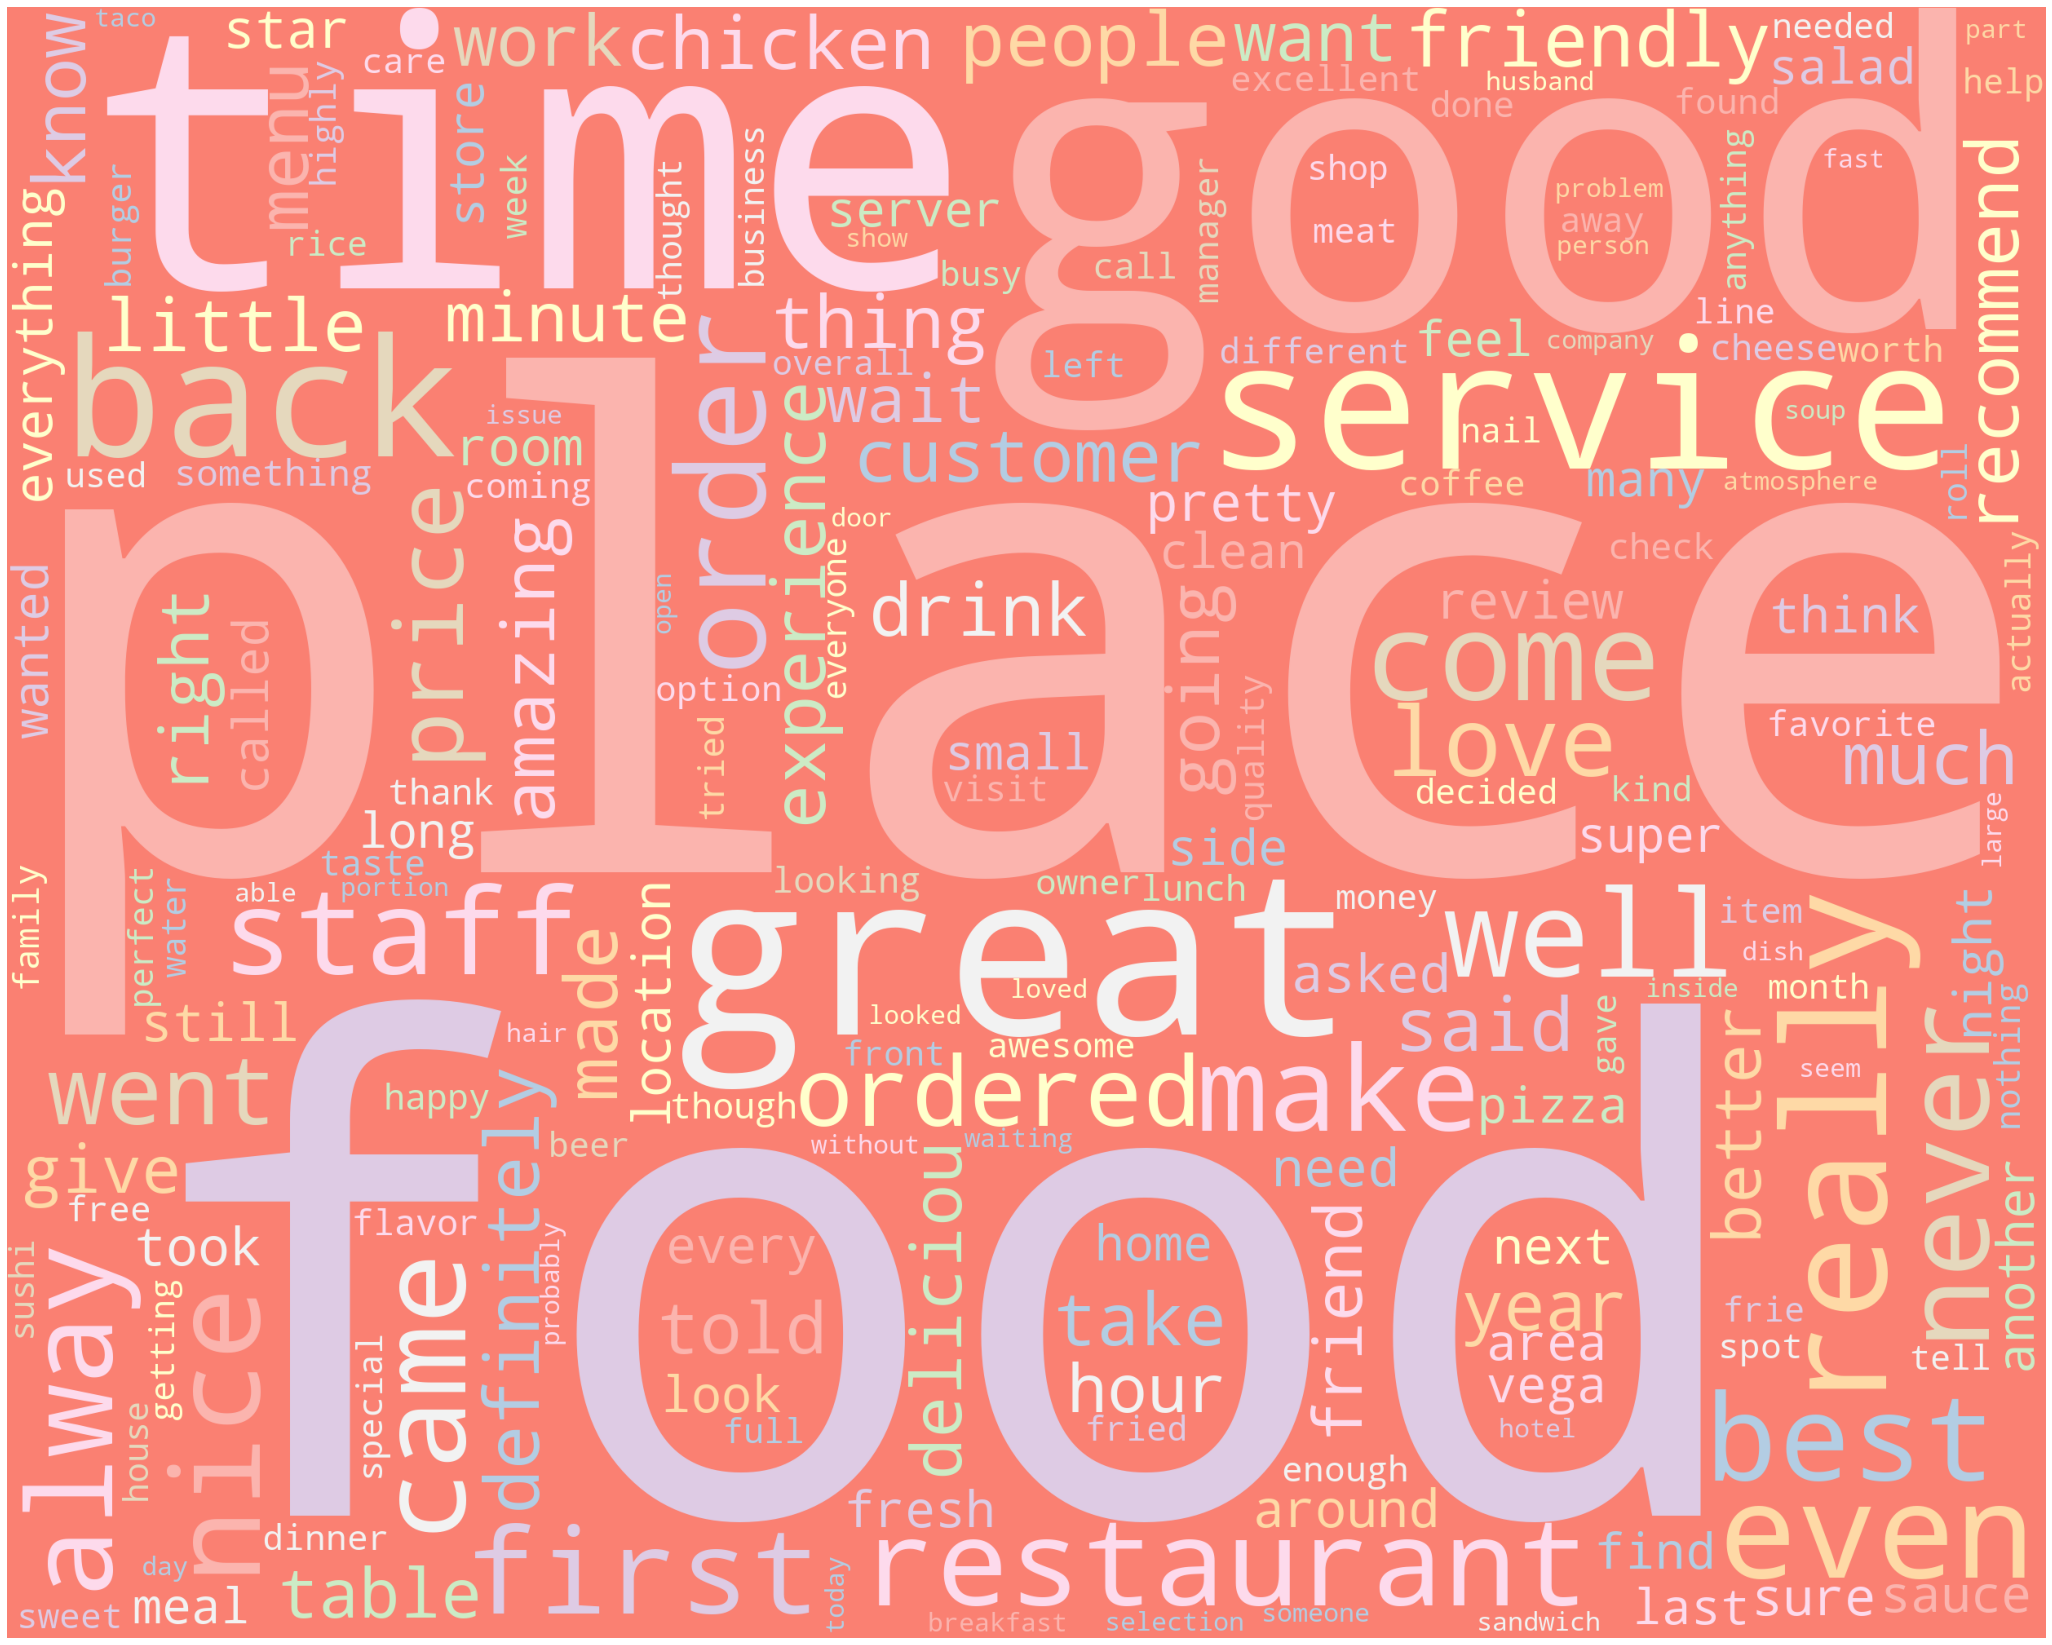

In [ ]:
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloud = WordCloud(width = 2500, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(all_r)
# Plot
plot_cloud(wordcloud)